<a href="https://colab.research.google.com/github/ashutosh-619/The-Sparks-Foundation-Internship/blob/main/Task_6_Prediction_Using_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task: Create a Decision Tree classifier and visualize it graphically. Work upon the Iris dataset.**

Author: Ashutosh Pandey

In [1]:
#We start by importing libraries.
import numpy as np                                                #for basic data handling and linear algebra functions
import pandas as pd                                               #to deal with dataframes
from sklearn.model_selection import train_test_split              #to perform the split to obtain training and test sets
from sklearn.tree import DecisionTreeClassifier                   #our classifier for this task
from sklearn.metrics import accuracy_score                        #accuracy will be the evaluation metric
import matplotlib.pyplot as plt                                   #for data visualization
import seaborn as sns                                         
%matplotlib inline

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#check for missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

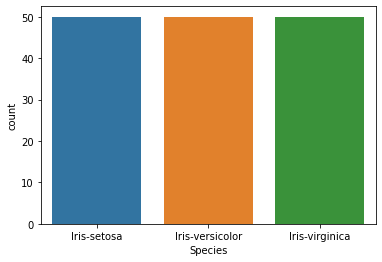

In [5]:
#We check the count of the labels in the final column so as to determine whether the dataset is imbalanced or not. (Though decision trees aren't generally affected by imbalanced datasets.)
sns.countplot(x='Species', data=df)

As it can be observed, the dataset is perfectly balanced.

In [6]:
#Splitting our dataset into X and y.
X = df.iloc[:, [1,2,3,4]]
y = df.iloc[:, -1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

In [8]:
#Now we create an instance of the DecisionTreeClassifier()
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


**We got an accuracy of 93.33% on the test dataset which is pretty good!**

In [10]:
#Now we'll try to visualize our decision tree. For it we need to first install a library.
#Ignore this cell if you already have pydotplus on your machine.

!pip install pydotplus

In [11]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


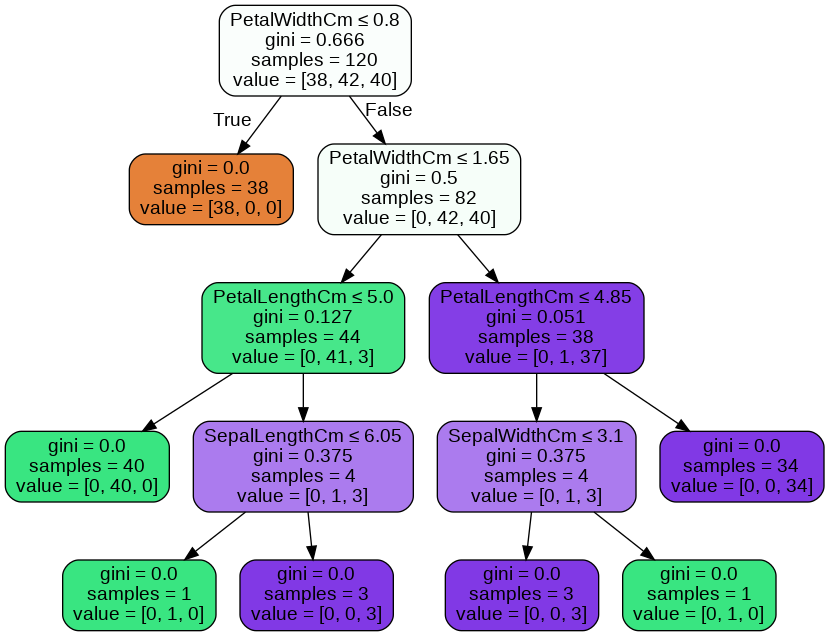

In [12]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=X.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Looks really nice, doesn't it? :)**